In [11]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt


In [12]:
dataset_path = "D:/NU/Semester 7/AIS411 NLP/Project/Imgs/archive"   


In [13]:
classes = sorted([
    folder for folder in os.listdir(dataset_path)
    if os.path.isdir(os.path.join(dataset_path, folder))
])

print(f"Found {len(classes)} classes")

samples_per_class = 1

Found 171 classes


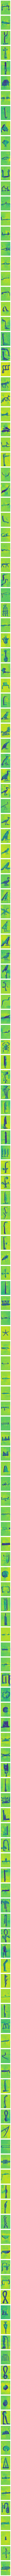

In [14]:
plt.figure(figsize=(12, len(classes) * 2))

plot_index = 1
for cls in classes:
    folder_path = os.path.join(dataset_path, cls)

    # List images
    img_files = [
        f for f in os.listdir(folder_path)
        if f.lower().endswith((".jpg", ".png", ".jpeg"))
    ]

    # FIX: ensure sample count does not exceed number of images
    k = min(samples_per_class, len(img_files))

    selected = random.sample(img_files, k)

    for img_file in selected:
        img_path = os.path.join(folder_path, img_file)
        img = Image.open(img_path)

        plt.subplot(len(classes), samples_per_class, plot_index)
        plt.imshow(img)
        plt.axis("off")

        # Label first column with class name
        if (plot_index - 1) % samples_per_class == 0:
            plt.ylabel(cls, rotation=0, labelpad=30, fontsize=10)

        plot_index += 1

plt.tight_layout()
plt.show()

In [15]:
import os
from PIL import Image, ImageOps, ImageFilter
import numpy as np

# -----------------------------------------------------------
# 1. Paths
# -----------------------------------------------------------
save_path = "D:/NU/Semester 7/AIS411 NLP/Project/Img_Clean"     # new folder

# Create output directory
os.makedirs(save_path, exist_ok=True)

# -----------------------------------------------------------
# 2. Preprocessing function
# -----------------------------------------------------------
def preprocess_image(img):
    # 1. Convert to grayscale
    img = ImageOps.grayscale(img)
    
    # 2. Resize to 128×128
    img = img.resize((128, 128))

    # 3. Optional: median filter (denoising)
    img = img.filter(ImageFilter.MedianFilter(size=3))
    
    # 4. Normalize (0 to 1)
    img_arr = np.array(img) / 255.0
    
    # Convert back to PIL
    img = Image.fromarray((img_arr * 255).astype("uint8"))
    
    return img

# -----------------------------------------------------------
# 3. Process all folders A1–A55
# -----------------------------------------------------------
classes = sorted([c for c in os.listdir(dataset_path)
                  if os.path.isdir(os.path.join(dataset_path, c))])

for cls in classes:
    input_folder = os.path.join(dataset_path, cls)
    output_folder = os.path.join(save_path, cls)
    os.makedirs(output_folder, exist_ok=True)

    print(f"Processing class: {cls}")

    for img_file in os.listdir(input_folder):
        if not img_file.lower().endswith((".jpg", ".jpeg", ".png")):
            continue
        
        img_path = os.path.join(input_folder, img_file)

        try:
            img = Image.open(img_path)
            img = preprocess_image(img)

            # Save processed image
            output_path = os.path.join(output_folder, img_file)
            img.save(output_path)

        except Exception as e:
            print("Error:", img_path, e)

print("\nPreprocessing completed!")


Processing class: A55
Processing class: Aa15
Processing class: Aa26
Processing class: Aa27
Processing class: Aa28
Processing class: D1
Processing class: D10
Processing class: D156
Processing class: D19
Processing class: D2
Processing class: D21
Processing class: D28
Processing class: D34
Processing class: D35
Processing class: D36
Processing class: D39
Processing class: D4
Processing class: D46
Processing class: D52
Processing class: D53
Processing class: D54
Processing class: D56
Processing class: D58
Processing class: D60
Processing class: D62
Processing class: E1
Processing class: E17
Processing class: E23
Processing class: E34
Processing class: E9
Processing class: F12
Processing class: F13
Processing class: F16
Processing class: F18
Processing class: F21
Processing class: F22
Processing class: F23
Processing class: F26
Processing class: F29
Processing class: F30
Processing class: F31
Processing class: F32
Processing class: F34
Processing class: F35
Processing class: F4
Processing 

A55: 1
Aa15: 3
Aa26: 5
Aa27: 3
Aa28: 1
D1: 5
D10: 3
D156: 3
D19: 3
D2: 24
D21: 183
D28: 17
D34: 1
D35: 57
D36: 59
D39: 2
D4: 37
D46: 50
D52: 5
D53: 1
D54: 12
D56: 3
D58: 36
D60: 6
D62: 1
E1: 7
E17: 1
E23: 10
E34: 122
E9: 10
F12: 1
F13: 8
F16: 7
F18: 6
F21: 1
F22: 1
F23: 1
F26: 4
F29: 1
F30: 1
F31: 8
F32: 1
F34: 10
F35: 3
F4: 4
F40: 2
F9: 3
G1: 35
G10: 1
G14: 2
G17: 195
G21: 2
G25: 27
G26: 2
G29: 3
G35: 38
G36: 9
G37: 3
G39: 21
G4: 8
G40: 8
G43: 197
G5: 31
G50: 1
G7: 11
H6: 7
I10: 41
I5: 1
I9: 146
L1: 3
M1: 3
M12: 3
M16: 2
M17: 364
M18: 13
M195: 3
M20: 3
M23: 38
M26: 1
M29: 3
M3: 4
M4: 1
M40: 3
M41: 3
M42: 5
M44: 7
M8: 2
N1: 18
N14: 14
N16: 1
N17: 8
N18: 19
N19: 1
N2: 1
N24: 1
N25: 2
N26: 1
N29: 18
N30: 12
N31: 17
N35: 448
N36: 2
N37: 30
N41: 3
N5: 21
O1: 20
O11: 1
O28: 10
O29: 1
O31: 7
O34: 19
O4: 14
O49: 13
O50: 106
O51: 1
P1: 5
P13: 1
P6: 3
P8: 16
P98: 5
Q1: 17
Q3: 77
Q7: 3
R4: 3
R8: 67
S24: 2
S28: 2
S29: 265
S34: 10
S42: 1
T14: 1
T20: 4
T21: 3
T22: 9
T28: 2
T30: 3
U1: 25
U15: 13
U28

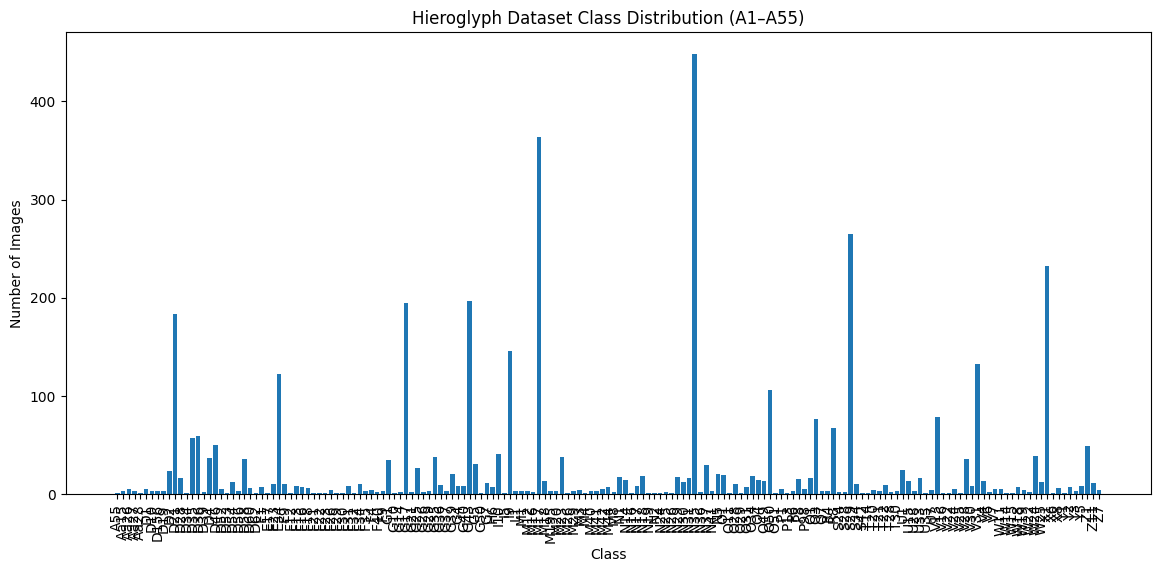

In [ ]:
import os
import matplotlib.pyplot as plt

class_counts = {}

for cls in sorted(os.listdir(dataset_path)):
    cls_path = os.path.join(dataset_path, cls)
    if os.path.isdir(cls_path):
        count = len([
            f for f in os.listdir(cls_path)
            if f.lower().endswith((".jpg", ".png", ".jpeg"))
        ])
        class_counts[cls] = count

for cls, cnt in class_counts.items():
    print(f"{cls}: {cnt}")

plt.figure(figsize=(14, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=90)
plt.title("Hieroglyph Dataset Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()


In [21]:
import os
import random
import shutil
from PIL import Image, ImageEnhance

# -----------------------------
# Paths
# -----------------------------
dataset_path = "D:/NU/Semester 7/AIS411 NLP/Project/Img_Clean"    # preprocessed images
balanced_path = "D:/NU/Semester 7/AIS411 NLP/Project/Img_Final"
os.makedirs(balanced_path, exist_ok=True)

# -----------------------------
# Parameters
# -----------------------------
TARGET_SIZE = 100   # desired number of images per class after upsampling
UPSAMPLE_THRESHOLD = 30  # only classes with less than this will be upsampled

# -----------------------------
# Simple augmentation
# -----------------------------
def augment_image(img):
    """Simple augmentation: rotate, flip, or change brightness"""
    img = img.copy()
    choice = random.choice(['rotate', 'flip', 'bright', 'none'])
    
    if choice == 'rotate':
        angle = random.choice([90, 180, 270])
        img = img.rotate(angle)
    elif choice == 'flip':
        img = img.transpose(Image.FLIP_LEFT_RIGHT)
    elif choice == 'bright':
        enhancer = ImageEnhance.Brightness(img)
        img = enhancer.enhance(random.uniform(0.7, 1.3))
    
    return img

# -----------------------------
# List all classes
# -----------------------------
classes = sorted([f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))])

# -----------------------------
# Process each class
# -----------------------------
for cls in classes:
    src_folder = os.path.join(dataset_path, cls)
    dst_folder = os.path.join(balanced_path, cls)
    os.makedirs(dst_folder, exist_ok=True)

    img_files = [f for f in os.listdir(src_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    num_images = len(img_files)

    print(f"{cls}: original {num_images} images")

    # Copy all existing images
    for img_name in img_files:
        shutil.copy(os.path.join(src_folder, img_name), os.path.join(dst_folder, img_name))

    # Only upsample if class has less than threshold
    if num_images < UPSAMPLE_THRESHOLD:
        while len(os.listdir(dst_folder)) < TARGET_SIZE:
            img_name = random.choice(img_files)
            img_path = os.path.join(src_folder, img_name)
            img = Image.open(img_path)

            # Augment image
            img_aug = augment_image(img)

            # Save with a unique name
            new_name = f"{os.path.splitext(img_name)[0]}_aug_{random.randint(0,10000)}.png"
            img_aug.save(os.path.join(dst_folder, new_name))


    print(f"{cls}: final {len(os.listdir(dst_folder))} images")

print("\n✅ Upsampling for small classes")


A55: original 1 images
A55: final 100 images
Aa15: original 3 images
Aa15: final 100 images
Aa26: original 5 images
Aa26: final 100 images
Aa27: original 3 images
Aa27: final 100 images
Aa28: original 1 images
Aa28: final 100 images
D1: original 5 images
D1: final 100 images
D10: original 3 images
D10: final 100 images
D156: original 3 images
D156: final 100 images
D19: original 3 images
D19: final 100 images
D2: original 24 images
D2: final 100 images
D21: original 183 images
D21: final 183 images
D28: original 17 images
D28: final 100 images
D34: original 1 images
D34: final 100 images
D35: original 57 images
D35: final 57 images
D36: original 59 images
D36: final 59 images
D39: original 2 images
D39: final 100 images
D4: original 37 images
D4: final 37 images
D46: original 50 images
D46: final 50 images
D52: original 5 images
D52: final 100 images
D53: original 1 images
D53: final 100 images
D54: original 12 images
D54: final 100 images
D56: original 3 images
D56: final 100 images
D